In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn import preprocessing
from imblearn.datasets import make_imbalance
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
#from six import StringIO 
#from sklearn.tree import export_graphviz
#import pydot 
# from IPython.display import Image 
from sklearn import inspection
# import mlxtend
# from mlxtend.evaluate import feature_importance_permutation
#from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# A host of Scikit-learn models
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.kernel_approximation import Nystroem
# from sklearn.kernel_approximation import RBFSampler
#from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score
from mlens.visualization import corrmat
from joblib import dump, load

[MLENS] backend: threading


In [2]:
df = pd.read_excel(r'D:\0_sea_ice_challenge\processing\modified_trainset.xlsx')
print(df.columns)


Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5',
       'wind_val_mag', 'wind_quadrant', 'wind_dir', 'sic_CDR', 'h_piomas',
       'd2c'],
      dtype='object')


In [30]:
var=df.copy()
var.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
0,0,1979,2,49,147.506958,138.582672,-0.797554,1.114740,1.370671,125.582277,2,-6.704156,-0.321260,6.711849,3,182.743485,0.990195,3.189743,522.523298
1,0,1979,2,49,146.834778,120.509880,0.643200,0.368754,0.741408,29.826147,1,-6.818630,-0.674205,6.851881,3,185.646875,0.966372,2.484009,412.767669
2,0,1979,2,49,130.993561,129.623672,-1.162420,0.243717,1.187695,168.158690,2,-8.825469,1.123955,8.896751,2,172.742248,0.996022,2.474106,362.547379
3,0,1979,2,49,147.524719,157.382492,0.919766,0.025784,0.920127,1.605796,1,-1.079951,-1.035410,1.496117,3,223.793757,0.982681,3.740522,381.025629
4,1,1979,2,50,147.470963,138.599823,0.380940,1.243485,1.300527,72.967623,1,-2.169171,2.537787,3.338513,2,130.522141,0.990302,3.188522,521.535334


In [31]:
var.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
0,0,1979,2,49,147.506958,138.582672,-0.797554,1.114740,1.370671,125.582277,2,-6.704156,-0.321260,6.711849,3,182.743485,0.990195,3.189743,522.523298
1,0,1979,2,49,146.834778,120.509880,0.643200,0.368754,0.741408,29.826147,1,-6.818630,-0.674205,6.851881,3,185.646875,0.966372,2.484009,412.767669
2,0,1979,2,49,130.993561,129.623672,-1.162420,0.243717,1.187695,168.158690,2,-8.825469,1.123955,8.896751,2,172.742248,0.996022,2.474106,362.547379
3,0,1979,2,49,147.524719,157.382492,0.919766,0.025784,0.920127,1.605796,1,-1.079951,-1.035410,1.496117,3,223.793757,0.982681,3.740522,381.025629
4,1,1979,2,50,147.470963,138.599823,0.380940,1.243485,1.300527,72.967623,1,-2.169171,2.537787,3.338513,2,130.522141,0.990302,3.188522,521.535334


In [32]:
var = var[['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'u_ERA5', 'v_ERA5','sic_CDR', 'h_piomas','d2c']]

In [33]:
var.shape

(339203, 14)

In [34]:
var.columns

Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c'],
      dtype='object')

In [35]:
var.dtypes

day_no        int64
year          int64
month         int64
doy           int64
x_EASE      float64
y_EASE      float64
u_buoy      float64
v_buoy      float64
val_mag     float64
u_ERA5      float64
v_ERA5      float64
sic_CDR     float64
h_piomas    float64
d2c         float64
dtype: object

In [36]:
var.describe()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
count,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000
mean,10374.519264,2007.017715,6.746862,189.943291,163.580333,156.494980,-0.333268,1.360217,8.354355,-0.096073,0.335635,0.955251,2.069756,418.241205
std,3587.901557,9.817846,3.453604,105.545448,24.443882,34.704966,8.075045,7.860813,7.691850,4.320043,4.123823,0.124664,0.922228,259.875226
min,0.000000,1979.000000,1.000000,1.000000,39.168983,36.870293,-74.682899,-66.781601,0.000000,-23.084634,-20.146717,0.000027,0.000000,0.359009
25%,7860.500000,2000.000000,4.000000,101.000000,146.797035,129.199318,-3.725245,-2.324845,2.888850,-3.149338,-2.617492,0.976678,1.478115,210.261503
50%,11106.000000,2009.000000,7.000000,190.000000,161.220627,152.304901,-0.024725,0.321954,6.665244,-0.165271,0.289756,1.000000,2.041318,389.715241
75%,13293.000000,2015.000000,10.000000,285.000000,181.103218,179.585617,2.943056,4.967892,11.675371,2.933966,3.203830,1.000000,2.619862,599.311791
max,14925.000000,2019.000000,12.000000,364.000000,279.391541,279.562073,68.396103,68.639801,75.609704,17.911558,22.862028,1.000000,6.284669,1120.364872


In [37]:
range1 = list(np.arange(0,1,.1)) + list(np.arange(.91,.99,.01)) + list(np.arange(.99,1.0001,.001))
p = var.val_mag.quantile(range1)

In [38]:
df1 = pd.DataFrame(p)
df1.head()

,val_mag
0.0,0.000000
0.1,0.502237
0.2,2.107865
0.3,3.636044
0.4,5.110915


In [39]:
a=[]
for i in df1.iterrows():
    percentile_value = i[1]['val_mag']
    size = var[var['val_mag']<=percentile_value].shape[0]
    a.append(size)

In [40]:
b=[0]+a
del b[-1]

In [41]:
print(len(b))
print(b)

29
[0, 9104, 33921, 67841, 101761, 135681, 169602, 203522, 237442, 271362, 305282, 308674, 312066, 315458, 318850, 322242, 325634, 329026, 332418, 335810, 336150, 336489, 336828, 337167, 337506, 337846, 338185, 338524, 338863]


In [42]:
print(len(a))
print(a)

29
[9104, 33921, 67841, 101761, 135681, 169602, 203522, 237442, 271362, 305282, 308674, 312066, 315458, 318850, 322242, 325634, 329026, 332418, 335810, 336150, 336489, 336828, 337167, 337506, 337846, 338185, 338524, 338863, 339203]


In [43]:
c = np.array(a) - np.array(b)
print(c)

[ 9104 24817 33920 33920 33920 33921 33920 33920 33920 33920  3392  3392
  3392  3392  3392  3392  3392  3392  3392   340   339   339   339   339
   340   339   339   339   340]


In [44]:
df1['count'] = c

In [45]:
df1


,val_mag,count
0.000,0.000000,9104
0.100,0.502237,24817
0.200,2.107865,33920
0.300,3.636044,33920
0.400,5.110915,33920
0.500,6.665244,33921
0.600,8.390036,33920
0.700,10.439153,33920
0.800,13.151437,33920
0.900,17.649177,33920


In [46]:
var['type'] = var.val_mag.map(lambda x: 0 if x == 0 else 2 if x > 30 else 1)

In [47]:
print(var['type'].value_counts())

1    323755
0      9104
2      6344
Name: type, dtype: int64


In [48]:
var = var.sample(frac=1).reset_index(drop=True)

In [49]:
var.shape

(339203, 15)

In [50]:
train1 = var.iloc[0:270000,:]
test1 = var.iloc[270000:,:]

In [51]:
test1.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,type
270000,14877,2019,11,316,195.208130,172.710083,-13.061250,1.129220,13.109973,-7.773542,1.414408,1.000000,1.325901,653.655085,1
270001,3259,1988,1,21,154.409119,185.183395,0.128216,0.335552,0.359214,0.571944,8.576569,1.000000,4.293468,92.659033,1
270002,9436,2004,12,354,160.428070,149.718887,-5.830130,0.675873,5.869176,-6.708067,1.083158,1.000000,2.377894,740.260515,1
270003,14528,2018,11,332,179.969086,218.650604,-16.087950,34.308949,37.893615,-1.176965,15.276292,0.933989,1.538990,174.984716,2
270004,9093,2004,1,11,144.637817,136.970627,0.213517,-5.702970,5.706966,-2.004222,-3.643552,0.999414,2.465387,489.917253,1


In [52]:
print(train1['type'].value_counts())

1    257714
0      7228
2      5058
Name: type, dtype: int64


In [53]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(train1['type'])
cov_dummy.head()
cov_dummy.shape

(270000, 3)

In [54]:
df2 = pd.concat([cov_dummy, train1], axis = 1)
print(df2.shape)
df2.head()

(270000, 18)


,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,type
0,0,1,0,8602,2002,9,250,163.550034,134.654678,10.517245,-3.546081,11.098970,4.061550,-4.109134,0.990236,1.807619,859.328535,1
1,0,1,0,5984,1995,7,189,151.014496,130.369644,8.933105,6.593245,11.102759,6.531604,0.538758,0.956297,2.221513,663.534720,1
2,0,1,0,10374,2007,7,196,156.283752,120.978416,6.209480,3.674120,7.215040,4.169741,-1.148364,0.747352,1.380677,472.286446,1
3,0,1,0,14567,2019,1,6,153.210556,135.907501,-2.084133,4.404915,4.873078,2.023560,3.753285,1.000000,1.566163,678.844806,1
4,0,1,0,14495,2018,10,299,136.102661,152.708817,18.783150,2.615185,18.964332,12.295628,-6.458427,1.000000,2.343891,127.774064,1


In [55]:
df2_column_names = list(df2.columns)
df2_column_names.remove('type')
df2_column_names

[0,
 1,
 2,
 'day_no',
 'year',
 'month',
 'doy',
 'x_EASE',
 'y_EASE',
 'u_buoy',
 'v_buoy',
 'val_mag',
 'u_ERA5',
 'v_ERA5',
 'sic_CDR',
 'h_piomas',
 'd2c']

In [56]:
# Normalize all columns

x = df2.loc[:, df2.columns != 'type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df2_column_names)


In [57]:
print(df_normalized.shape)
print(df2.shape)

(270000, 17)
(270000, 18)


In [58]:
df_normalized

,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
0,0.0,1.0,0.0,0.576348,0.575,0.727273,0.685950,0.517774,0.402916,0.595476,0.466954,0.146793,0.672343,0.352805,0.990234,0.287624,0.767159
1,0.0,1.0,0.0,0.400938,0.400,0.545455,0.517906,0.465591,0.385260,0.584404,0.541826,0.146843,0.733520,0.464335,0.956286,0.353481,0.592293
2,0.0,1.0,0.0,0.695075,0.700,0.545455,0.537190,0.487526,0.346564,0.565369,0.520270,0.095425,0.675022,0.423851,0.747288,0.219690,0.421486
3,0.0,1.0,0.0,0.976013,1.000,0.000000,0.013774,0.474733,0.408078,0.507403,0.525667,0.064450,0.621867,0.541470,1.000000,0.249204,0.605966
4,0.0,1.0,0.0,0.971189,0.975,0.818182,0.820937,0.403516,0.477307,0.653248,0.512451,0.250819,0.876280,0.296431,1.000000,0.372954,0.113796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,0.0,1.0,0.0,0.322546,0.325,0.272727,0.314050,0.562580,0.723276,0.526870,0.509490,0.030719,0.544748,0.458192,0.988978,0.675741,0.095160
269996,0.0,1.0,0.0,0.897889,0.900,0.818182,0.826446,0.591917,0.554415,0.527009,0.533600,0.073092,0.601567,0.537665,0.998338,0.245307,0.752521
269997,0.0,1.0,0.0,0.977889,1.000,0.090909,0.090909,0.503678,0.565966,0.495613,0.549994,0.113388,0.450029,0.554165,1.000000,0.405699,0.357190
269998,0.0,1.0,0.0,0.869883,0.875,0.727273,0.680441,0.414810,0.371909,0.433432,0.388721,0.251092,0.359921,0.357478,0.342899,0.047024,0.440491


In [59]:
RANDOM_STATE = 7

In [60]:
#append Y axis back to this 
df_normalized_w_target = pd.concat([df_normalized, df2['type']], axis=1)
df_normalized_w_target.tail()

,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,type
269995,0.0,1.0,0.0,0.322546,0.325,0.272727,0.314050,0.562580,0.723276,0.526870,0.509490,0.030719,0.544748,0.458192,0.988978,0.675741,0.095160,1
269996,0.0,1.0,0.0,0.897889,0.900,0.818182,0.826446,0.591917,0.554415,0.527009,0.533600,0.073092,0.601567,0.537665,0.998338,0.245307,0.752521,1
269997,0.0,1.0,0.0,0.977889,1.000,0.090909,0.090909,0.503678,0.565966,0.495613,0.549994,0.113388,0.450029,0.554165,1.000000,0.405699,0.357190,1
269998,0.0,1.0,0.0,0.869883,0.875,0.727273,0.680441,0.414810,0.371909,0.433432,0.388721,0.251092,0.359921,0.357478,0.342899,0.047024,0.440491,1
269999,1.0,0.0,0.0,0.827337,0.825,1.000000,0.944904,0.443070,0.473681,0.521970,0.493139,0.000000,0.552694,0.475307,1.000000,0.307591,0.326810,0


In [61]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[3:-1]]
print(X.shape)
X.head()

(270000, 14)


,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
0,0.576348,0.575,0.727273,0.685950,0.517774,0.402916,0.595476,0.466954,0.146793,0.672343,0.352805,0.990234,0.287624,0.767159
1,0.400938,0.400,0.545455,0.517906,0.465591,0.385260,0.584404,0.541826,0.146843,0.733520,0.464335,0.956286,0.353481,0.592293
2,0.695075,0.700,0.545455,0.537190,0.487526,0.346564,0.565369,0.520270,0.095425,0.675022,0.423851,0.747288,0.219690,0.421486
3,0.976013,1.000,0.000000,0.013774,0.474733,0.408078,0.507403,0.525667,0.064450,0.621867,0.541470,1.000000,0.249204,0.605966
4,0.971189,0.975,0.818182,0.820937,0.403516,0.477307,0.653248,0.512451,0.250819,0.876280,0.296431,1.000000,0.372954,0.113796


In [62]:
X.shape

(270000, 14)

In [63]:
X = X.drop(['u_buoy', 'v_buoy','val_mag'],axis=1)

In [64]:
X.shape

(270000, 11)

In [65]:
X.columns

Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_ERA5',
       'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c'],
      dtype='object')

In [66]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()


(270000,)


0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [67]:
print(X.shape)
print(Y.shape)

(270000, 11)
(270000,)


In [69]:
#sample the data, 6300 per output
x, y = make_imbalance(X, Y,
                      sampling_strategy={0: 5000, 1: 5000, 2: 5000},
                      random_state=RANDOM_STATE)

In [70]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=RANDOM_STATE)

In [71]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({0: 3782, 2: 3766, 1: 3702})
Testing target statistics: Counter({1: 1298, 2: 1234, 0: 1218})


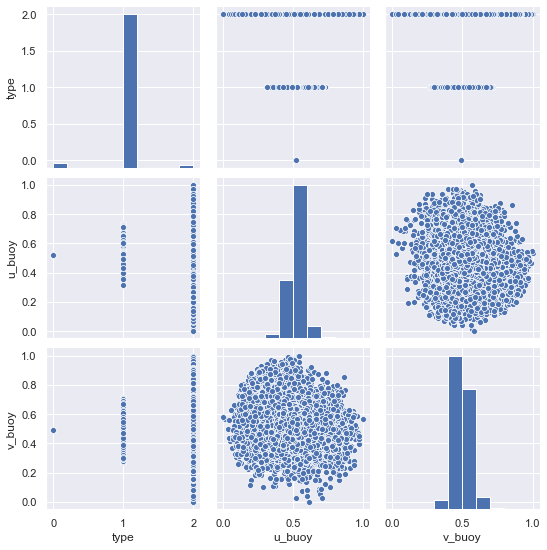

In [72]:
sns.set()
cols2 = ['type', 'u_buoy', 'v_buoy']
sns.pairplot(df_normalized_w_target[cols2], height = 2.5)
plt.show();

In [73]:
clf = DecisionTreeClassifier(random_state=7)

In [74]:
clf = clf.fit(X_train, y_train)

In [75]:
dtree = DecisionTreeClassifier( random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
predictions = dtree.predict(X_test)

In [77]:
#this is for all the variables
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.8632


In [78]:
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.86


In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1218
           1       0.83      0.80      0.82      1298
           2       0.86      0.86      0.86      1234

    accuracy                           0.86      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.86      0.86      0.86      3750



In [80]:
X_test

,day_no,year,month,doy,x_EASE,y_EASE,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
404,0.996851,1.000,0.909091,0.870523,0.347148,0.307956,0.342452,0.425144,0.937383,0.041192,0.012797
5221,0.272228,0.275,0.272727,0.256198,0.479318,0.276747,0.687650,0.354575,1.000000,0.397478,0.116230
3357,0.859229,0.875,0.181818,0.242424,0.408983,0.287095,0.637435,0.358787,0.773135,0.372472,0.015003
7336,0.861441,0.875,0.363636,0.333333,0.398827,0.374579,0.672725,0.518224,0.998966,0.336630,0.413329
8313,0.842881,0.850,0.545455,0.575758,0.609448,0.324853,0.473079,0.481099,0.808714,0.111759,0.377160
...,...,...,...,...,...,...,...,...,...,...,...
3120,0.962747,0.975,0.454545,0.473829,0.451577,0.279876,0.621922,0.427418,0.959316,0.225032,0.019071
14216,0.870620,0.875,0.727273,0.710744,0.409548,0.368803,0.771100,0.360812,0.551233,0.040372,0.412167
14455,0.904054,0.925,0.000000,0.074380,0.542962,0.817857,0.472609,0.684584,0.996055,0.275701,0.147273
56,0.863920,0.875,0.454545,0.435262,0.408983,0.287095,0.590277,0.393188,0.773135,0.212681,0.015003


In [81]:
print(confusion_matrix(y_test,predictions))

[[1127   69   22]
 [  97 1044  157]
 [  29  139 1066]]


Text(0, 0.5, 'Accuracy Rate')

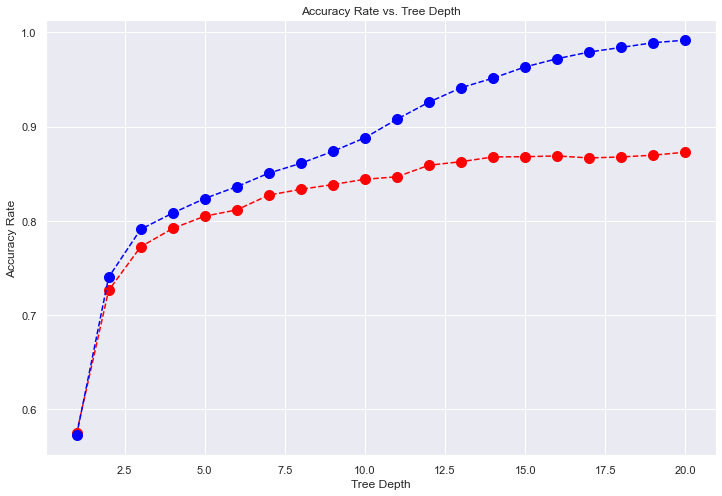

In [82]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))

plt.plot(np.arange(1,21), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,21), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

#blue - trianing accuracy 
# red - testing accuracyy

In [83]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
rfc_pred = rfc.predict(X_test)

In [85]:
y_pred =  rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baselsine:", metrics.accuracy_score(y_test, rfc.predict(X_test)))

Random Forest Train Accuracy Baseline: 1.0
Random Forest Test Accuracy Baselsine: 0.9272


In [86]:
print(confusion_matrix(y_test,rfc_pred))

[[1155   53   10]
 [  44 1153  101]
 [   9   56 1169]]


In [87]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1218
           1       0.91      0.89      0.90      1298
           2       0.91      0.95      0.93      1234

    accuracy                           0.93      3750
   macro avg       0.93      0.93      0.93      3750
weighted avg       0.93      0.93      0.93      3750



# Hyperparameter Tuning - Random Forest

In [88]:
#sample the data, 6300 per output
x, y = make_imbalance(X, Y,
                      sampling_strategy={0: 5000, 1: 5000, 2: 5000},
                      random_state=RANDOM_STATE)

In [89]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=5)

In [90]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({1: 3778, 2: 3750, 0: 3722})
Testing target statistics: Counter({0: 1278, 2: 1250, 1: 1222})


In [91]:
# Random forest baseline performance
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [92]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15, 20, None],
    'min_samples_leaf': [1, 10, 20, 50, 100,500],
    'min_samples_split': [2, 30, 40,100],
}
param_grid

{'bootstrap': [True],
 'max_depth': [10, 15, 20, None],
 'min_samples_leaf': [1, 10, 20, 50, 100, 500],
 'min_samples_split': [2, 30, 40, 100]}

In [93]:
# Create a based model
rfc_gs = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc_gs, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [94]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  6.0min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [1, 10, 20, 50, 100, 500],
                         'min_samples_split': [2, 30, 40, 100]},
             verbose=2)

In [95]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [96]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier()

In [97]:
optimal_param_grid = {
    'bootstrap': [True],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
}

In [98]:
grid_search = GridSearchCV(estimator = rfc, param_grid = optimal_param_grid, 
                          cv = 25, n_jobs = -1, verbose = 2)

In [99]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 25 folds for each of 1 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.2s finished


GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'min_samples_leaf': [1],
                         'min_samples_split': [2]},
             verbose=2)

In [100]:
rfc_pred_gs = grid_search.predict(X_test)

y_pred_gs =  grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_train, grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_test, grid_search.predict(X_test)))

Random Forest Train Accuracy Baseline After Grid Search: 1.0
Random Forest Test Accuracy Baseline After Grid Search: 0.9234666666666667


Text(0, 0.5, 'Accuracy Rate')

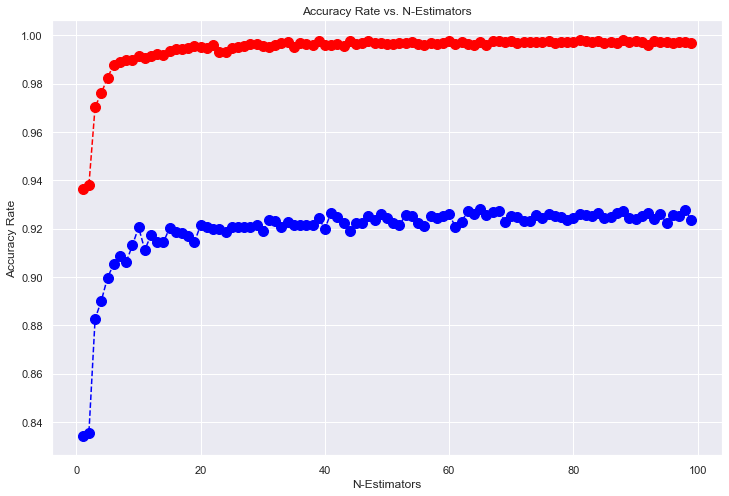

In [101]:
accuracy_rate = []
training_acc = []

for i in range(1,100):   
    rfc_plot = RandomForestClassifier(bootstrap=True,
                       max_depth=20, 
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=i)
    rfc_plot.fit(X_train, y_train) 
    accuracy_rate.append(rfc_plot.score(X_test, y_test))
    training_acc.append(rfc_plot.score(X_train, y_train))
    
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,100), accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(np.arange(1,100), training_acc,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#training > testing
plt.title('Accuracy Rate vs. N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('Accuracy Rate')